In [86]:
import sklearn
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

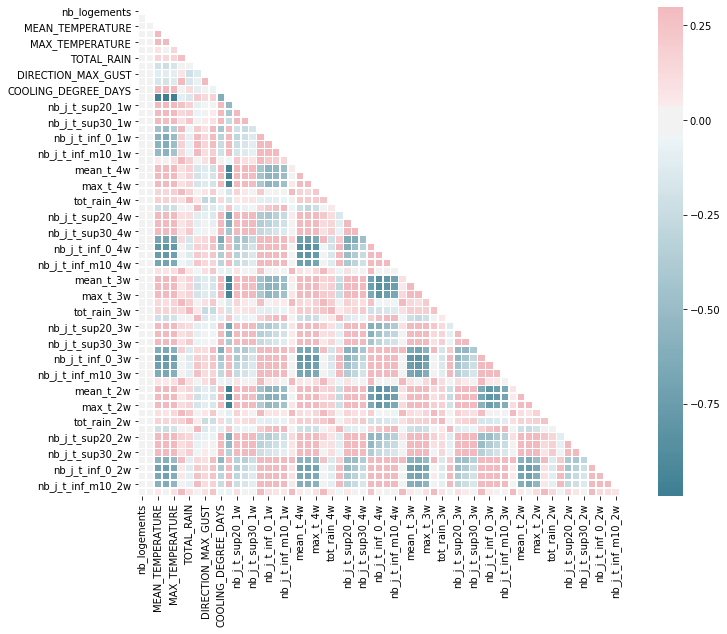

In [88]:
corr = X.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)#, cbar_kws={"shrink": .5})

In [12]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.metrics import accuracy_score, auc, average_precision_score, r2_score

In [66]:
X = pd.read_csv('../Data/X_final.csv')
Y = pd.read_csv('../Data/Y_final.csv')

In [67]:
X.columns

Index(['CENTROID Y', 'CENTROID X', 'nb_logements', 'prop_log_sociaux',
       'NB_EXTERMINATIONS', 'NB_EXTERMINATIONS_2', 'NB_EXTERMINATIONS_3',
       'NB_EXTERMINATIONS_4', 'id_week', 'MEAN_TEMPERATURE', 'MIN_TEMPERATURE',
       'MAX_TEMPERATURE', 'TOTAL_PRECIPITATION', 'TOTAL_RAIN', 'TOTAL_SNOW',
       'DIRECTION_MAX_GUST', 'SPEED_MAX_GUST', 'COOLING_DEGREE_DAYS',
       'HEATING_DEGREE_DAYS', 'nb_j_t_sup20_1w', 'nb_j_t_sup25_1w',
       'nb_j_t_sup30_1w', 'nb_j_t_inf_10_1w', 'nb_j_t_inf_0_1w',
       'nb_jt__inf_m5_1w', 'nb_j_t_inf_m10_1w', 'nb_j_precip_sup_5_1w',
       'mean_t_4w', 'min_t_4w', 'max_t_4w', 'tot_precip_4w', 'tot_rain_4w',
       'tot_snow_4w', 'nb_j_t_sup20_4w', 'nb_j_t_sup25_4w', 'nb_j_t_sup30_4w',
       'nb_j_t_inf_10_4w', 'nb_j_t_inf_0_4w', 'nb_jt__inf_m5_4w',
       'nb_j_t_inf_m10_4w', 'nb_j_precip_sup_5_4w', 'mean_t_3w', 'min_t_3w',
       'max_t_3w', 'tot_precip_3w', 'tot_rain_3w', 'tot_snow_3w',
       'nb_j_t_sup20_3w', 'nb_j_t_sup25_3w', 'nb_j_t_sup30_

In [74]:
X = X[['CENTROID Y', 'CENTROID X', 'nb_logements', 'prop_log_sociaux',
     'MEAN_TEMPERATURE', 'MIN_TEMPERATURE',
       'MAX_TEMPERATURE', 'TOTAL_PRECIPITATION', 'TOTAL_RAIN', 'TOTAL_SNOW',
       'DIRECTION_MAX_GUST', 'SPEED_MAX_GUST', 'COOLING_DEGREE_DAYS',
       'HEATING_DEGREE_DAYS', 'nb_j_t_sup20_1w', 'nb_j_t_sup25_1w',
       'nb_j_t_sup30_1w', 'nb_j_t_inf_10_1w', 'nb_j_t_inf_0_1w',
       'nb_jt__inf_m5_1w', 'nb_j_t_inf_m10_1w', 'nb_j_precip_sup_5_1w',
       'mean_t_4w', 'min_t_4w', 'max_t_4w', 'tot_precip_4w', 'tot_rain_4w',
       'tot_snow_4w', 'nb_j_t_sup20_4w', 'nb_j_t_sup25_4w', 'nb_j_t_sup30_4w',
       'nb_j_t_inf_10_4w', 'nb_j_t_inf_0_4w', 'nb_jt__inf_m5_4w',
       'nb_j_t_inf_m10_4w', 'nb_j_precip_sup_5_4w', 'mean_t_3w', 'min_t_3w',
       'max_t_3w', 'tot_precip_3w', 'tot_rain_3w', 'tot_snow_3w',
       'nb_j_t_sup20_3w', 'nb_j_t_sup25_3w', 'nb_j_t_sup30_3w',
       'nb_j_t_inf_10_3w', 'nb_j_t_inf_0_3w', 'nb_jt__inf_m5_3w',
       'nb_j_t_inf_m10_3w', 'nb_j_precip_sup_5_3w', 'mean_t_2w', 'min_t_4w.1',
       'max_t_2w', 'tot_precip_2w', 'tot_rain_2w', 'tot_snow_2w',
       'nb_j_t_sup20_2w', 'nb_j_t_sup25_2w', 'nb_j_t_sup30_2w',
       'nb_j_t_inf_10_2w', 'nb_j_t_inf_0_2w', 'nb_jt__inf_m5_2w',
       'nb_j_t_inf_m10_2w', 'nb_j_precip_sup_5_2w']]

In [75]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In [76]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train) 

pred = reg.predict(X_test)

r2_score(y_test[ 'LABEL_1mois'].tolist(), pred[ :, 0])

0.08055234745980411

In [77]:
r2_score(y_test[ 'LABEL_3mois'].tolist(), pred[ :, 1])

0.09615090516965319

In [78]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train) 

pred = reg.predict(X_test)

print(r2_score(y_test[ 'LABEL_1mois'].tolist(), pred[ :, 0]))
print(r2_score(y_test[ 'LABEL_3mois'].tolist(), pred[ :, 1]))

0.0805481839438078
0.0961467043012928


In [79]:
from sklearn import linear_model
reg = linear_model.Lasso()
reg.fit(X_train, y_train) 

pred = reg.predict(X_test)

print(r2_score(y_test[ 'LABEL_1mois'].tolist(), pred[ :, 0]))
print(r2_score(y_test[ 'LABEL_3mois'].tolist(), pred[ :, 1]))

-2.8019177575888676e-06
-1.3061466597186211e-05
